In [1]:
!pip install tpot 
!pip install scikit-learn==0.24.2

     |████████████████████████████████| 87 kB 5.5 MB/s 
     |████████████████████████████████| 160 kB 40.7 MB/s 
     |████████████████████████████████| 166.7 MB 11 kB/s 
  Created wheel for stopit: filename=stopit-1.1.2-py3-none-any.whl size=11952 sha256=1e438ae1396978f69b9490a27931ef2a3beb7a5fd2266b52e1bdfd020bb77414
  Stored in directory: /root/.cache/pip/wheels/e2/d2/79/eaf81edb391e27c87f51b8ef901ecc85a5363dc96b8b8d71e3
Successfully built stopit
  Attempting uninstall: xgboost
    Found existing installation: xgboost 0.90
    Uninstalling xgboost-0.90:
      Successfully uninstalled xgboost-0.90
     |████████████████████████████████| 22.3 MB 1.3 MB/s 
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 0.22.2.post1
    Uninstalling scikit-learn-0.22.2.post1:
      Successfully uninstalled scikit-learn-0.22.2.post1


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pickle

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from tpot import TPOTClassifier
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

In [3]:
df=pd.read_csv("/content/heart.csv")
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [4]:
df.shape

(303, 14)

In [5]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [6]:
x=df.drop('target',axis=1)
y=df['target']

In [7]:
scaler=StandardScaler()
scaling=scaler.fit_transform(x)
x=pd.DataFrame(scaling,columns=df.drop('target',axis=1).columns)
x.head()

In [8]:
final=pd.concat([x,y],axis=1)
final.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [9]:
#sns.pairplot(final)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


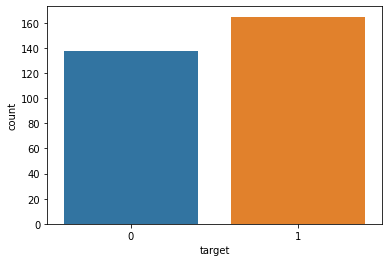

In [10]:
sns.countplot(y)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


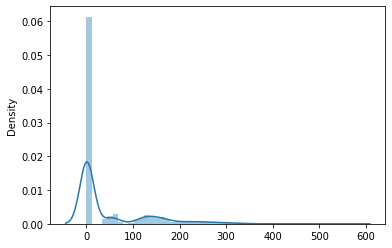

In [11]:
sns.distplot(x)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

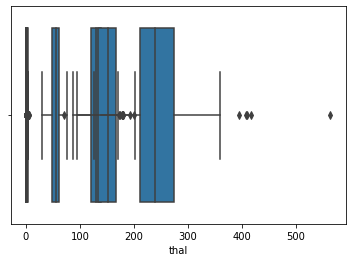

In [12]:
for i in x.columns:
  sns.boxplot(x[i])

In [13]:
def remove_outliers():
    for i in x.columns:
        mean=x[i].mean()
        std=x[i].std()
        upper_bound=mean + (3*std)
        lower_bound= mean - (3*std)
        x[i]=np.where(x[i]>upper_bound,upper_bound,x[i])
        x[i]=np.where(x[i]<lower_bound,lower_bound,x[i])
        

remove_outliers()        

In [14]:
x.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63.0,1.0,3.0,145.0,233.0,1.0,0.0,150.0,0.0,2.3,0.0,0.0,1.0
1,37.0,1.0,2.0,130.0,250.0,0.0,1.0,187.0,0.0,3.5,0.0,0.0,2.0
2,41.0,0.0,1.0,130.0,204.0,0.0,0.0,172.0,0.0,1.4,2.0,0.0,2.0
3,56.0,1.0,1.0,120.0,236.0,0.0,1.0,178.0,0.0,0.8,2.0,0.0,2.0
4,57.0,0.0,0.0,120.0,354.0,0.0,1.0,163.0,1.0,0.6,2.0,0.0,2.0


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

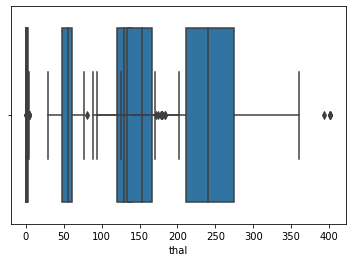

In [15]:
for i in x.columns: 
   sns.boxplot(x[i])

In [16]:
x.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
age,1.000000,-0.098447,-0.068653,0.283153,0.209087,0.121308,-0.116211,-0.398369,0.096801,0.211900,-0.168814,0.282312,0.068144
sex,-0.098447,1.000000,-0.049353,-0.054222,-0.190477,0.045032,-0.058196,-0.043244,0.141664,0.104022,-0.030711,0.117229,0.211751
cp,-0.068653,-0.049353,1.000000,0.051122,-0.092538,0.094444,0.044421,0.295786,-0.394280,-0.146091,0.119717,-0.184317,-0.164473
trestbps,0.283153,-0.054222,0.051122,1.000000,0.138115,0.173652,-0.111325,-0.049353,0.065358,0.185794,-0.117927,0.099308,0.058075
chol,0.209087,-0.190477,-0.092538,0.138115,1.000000,0.016518,-0.146837,-0.016199,0.078761,0.062272,0.002376,0.084098,0.089609
fbs,0.121308,0.045032,0.094444,0.173652,0.016518,1.000000,-0.084189,-0.009208,0.025665,0.009291,-0.059894,0.138926,-0.027415
restecg,-0.116211,-0.058196,0.044421,-0.111325,-0.146837,-0.084189,1.000000,0.045623,-0.070733,-0.058412,0.093045,-0.074503,-0.012477
thalach,-0.398369,-0.043244,0.295786,-0.049353,-0.016199,-0.009208,0.045623,1.000000,-0.381577,-0.349749,0.387649,-0.218982,-0.102644
exang,0.096801,0.141664,-0.394280,0.065358,0.078761,0.025665,-0.070733,-0.381577,1.000000,0.295690,-0.257748,0.117831,0.212403
oldpeak,0.211900,0.104022,-0.146091,0.185794,0.062272,0.009291,-0.058412,-0.349749,0.295690,1.000000,-0.576352,0.225646,0.208687


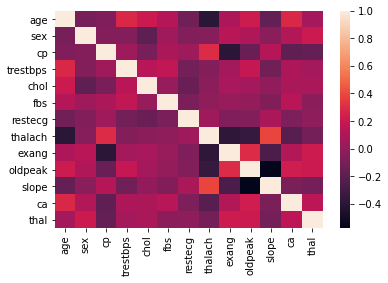

In [17]:
sns.heatmap(x.corr())

In [18]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1,random_state=42,shuffle=True)

In [19]:
a=RandomForestClassifier()
a.fit(x_train,y_train)

RandomForestClassifier()

In [20]:
y_pred=a.predict(x_test)

In [21]:
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[10  4]
 [ 2 15]]
0.8064516129032258
              precision    recall  f1-score   support

           0       0.83      0.71      0.77        14
           1       0.79      0.88      0.83        17

    accuracy                           0.81        31
   macro avg       0.81      0.80      0.80        31
weighted avg       0.81      0.81      0.80        31



In [22]:
pickle.dump(final,open('heart_disease_prediction.pkl',mode='wb'))

In [23]:
a.predict([[57,0,0,140,241,0,1,123,1,0.2,1,0,3]])

array([0])

In [25]:
import sklearn
sklearn.__version__

'0.24.2'